<a href="https://colab.research.google.com/github/sreeja2208/IDA/blob/main/task3_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'/content/prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.describe(include='object')

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
count,113937,113937,28953,113937,55089,84853,108422,110349,111682,13341,113937,113240,113937,113937,113937,113937,113937
unique,113066,113064,8,12,2802,7,51,67,8,706,112992,11585,8,113066,1873,33,90831
top,17A93590655669644DB4C06,2013-10-02 17:20:16.550000000,C,Current,2014-03-04 00:00:00,C,CA,Other,Employed,783C3371218786870A73D20,2013-12-23 09:38:12,1993-12-01 00:00:00,"$25,000-49,999",CB1B37030986463208432A1,2014-01-22 00:00:00,Q4 2013,63CA34120866140639431C9
freq,6,6,5649,56576,105,18345,14717,28617,67322,1140,6,185,32192,6,491,14450,9


In [8]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
print("Number of columns with more than 60% null values:",len(df.columns[df.isnull().sum()>df.shape[0]/1.5]))
print("Columns:")
df.columns[df.isnull().sum()>df.shape[0]/1.5]
# more than 60% of values of these columns are null

Number of columns with more than 60% null values: 11
Columns:


Index(['CreditGrade', 'GroupKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')

In [10]:
#Dropping above columns
df=df.drop(df.columns[df.isnull().sum()>df.shape[0]/1.5],axis=1)

In [11]:
#dropping duplicates in the dataframe
df=df.drop_duplicates(ignore_index=True)

In [12]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
numerics = ['float64', 'int64']
df_num = df.select_dtypes(include=numerics)

In [14]:
df_num.shape

(113937, 52)

In [15]:
df_normalized=df_num
for column in df_normalized.columns:
    df_normalized[column]=(df_normalized[column]-df_normalized[column].min())/(df_normalized[column].max()-df_normalized[column].min())

In [16]:
df_normalized.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0.153796,0.5,0.313647,0.317588,0.294527,NaN,NaN,NaN,NaN,NaN,...,0.762903,1.0,0.003754,0.036778,0.0,0.96,0.0,0.0,0.0,0.216330
1,0.963306,0.5,0.224672,0.184925,0.183085,0.521886,0.055386,0.509005,0.833333,0.6,...,0.953998,1.0,0.003754,0.036778,0.0,0.96,0.0,0.0,0.0,0.000000
2,0.065072,0.5,0.546030,0.552764,0.497512,NaN,NaN,NaN,NaN,NaN,...,0.919275,1.0,0.003754,0.036778,0.0,0.96,0.0,0.0,0.0,0.033670
3,0.524091,0.5,0.234795,0.195779,0.193831,0.532431,0.055386,0.520369,0.833333,0.8,...,0.799019,1.0,0.003754,0.036778,0.0,0.96,0.0,0.0,0.0,0.132155
4,0.724253,0.5,0.473762,0.419095,0.414925,0.727935,0.242592,0.586106,0.333333,0.3,...,0.867519,1.0,0.003754,0.036778,0.0,0.96,0.0,0.0,0.0,0.015993


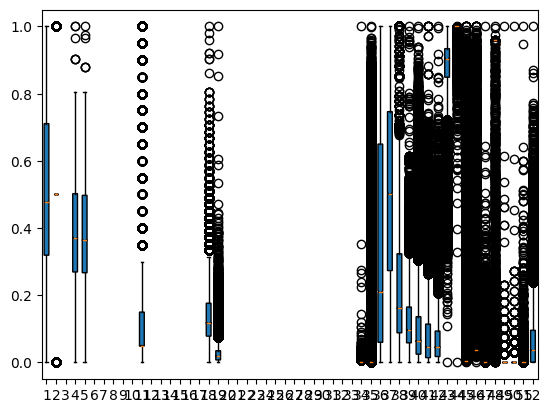

In [17]:
plt.boxplot(df_normalized,notch=True,patch_artist=True,meanline=True);

<Axes: >

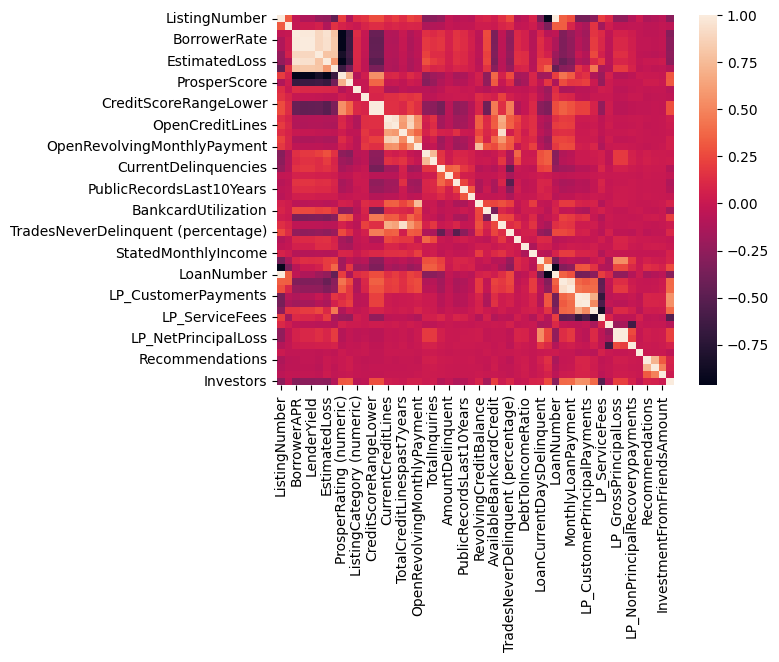

In [18]:
corr=df_num.corr()
sns.heatmap(df_num.corr())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Current'),
  Text(1, 0, 'Completed'),
  Text(2, 0, 'Chargedoff'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Past Due (1-15 days)'),
  Text(5, 0, 'Past Due (31-60 days)'),
  Text(6, 0, 'Past Due (61-90 days)'),
  Text(7, 0, 'Past Due (91-120 days)'),
  Text(8, 0, 'Past Due (16-30 days)'),
  Text(9, 0, 'FinalPaymentInProgress'),
  Text(10, 0, 'Past Due (>120 days)'),
  Text(11, 0, 'Cancelled')])

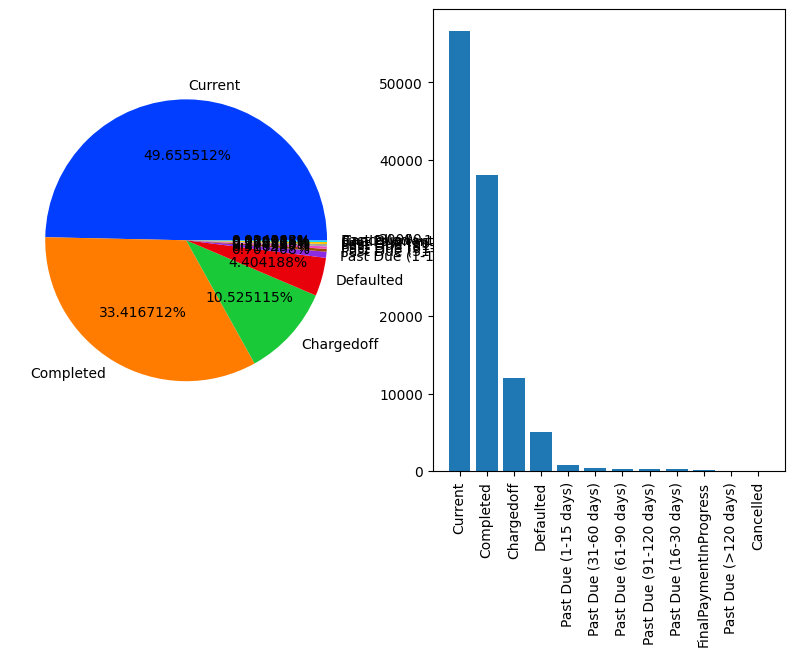

In [19]:
fig=plt.figure(figsize=(10,6))
grid=plt.GridSpec(1,2,hspace=0.5,wspace=0.2)
plt.subplot(grid[0,0])
colors = sns.color_palette('bright',11)
plt.pie(x=df.LoanStatus.value_counts(),colors=colors,labels=df.LoanStatus.value_counts().index,autopct='%1f%%');
plt.subplot(grid[0,1])
plt.bar(df.LoanStatus.value_counts().index,df.LoanStatus.value_counts())
plt.xticks(rotation=90)

In [20]:
df['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [21]:
df['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['LoanStatus']= label_encoder.fit_transform(df['LoanStatus'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['LoanStatus'].unique()

{0: 'Cancelled', 1: 'Chargedoff', 2: 'Completed', 3: 'Current', 4: 'Defaulted', 5: 'FinalPaymentInProgress', 6: 'Past Due (1-15 days)', 7: 'Past Due (16-30 days)', 8: 'Past Due (31-60 days)', 9: 'Past Due (61-90 days)', 10: 'Past Due (91-120 days)', 11: 'Past Due (>120 days)'}


array([ 2,  3,  6,  4,  1,  7,  0,  9,  8, 10,  5, 11])

In [23]:
df_status=df.groupby(df.LoanStatus)

In [24]:
label_mapping[11]

'Past Due (>120 days)'

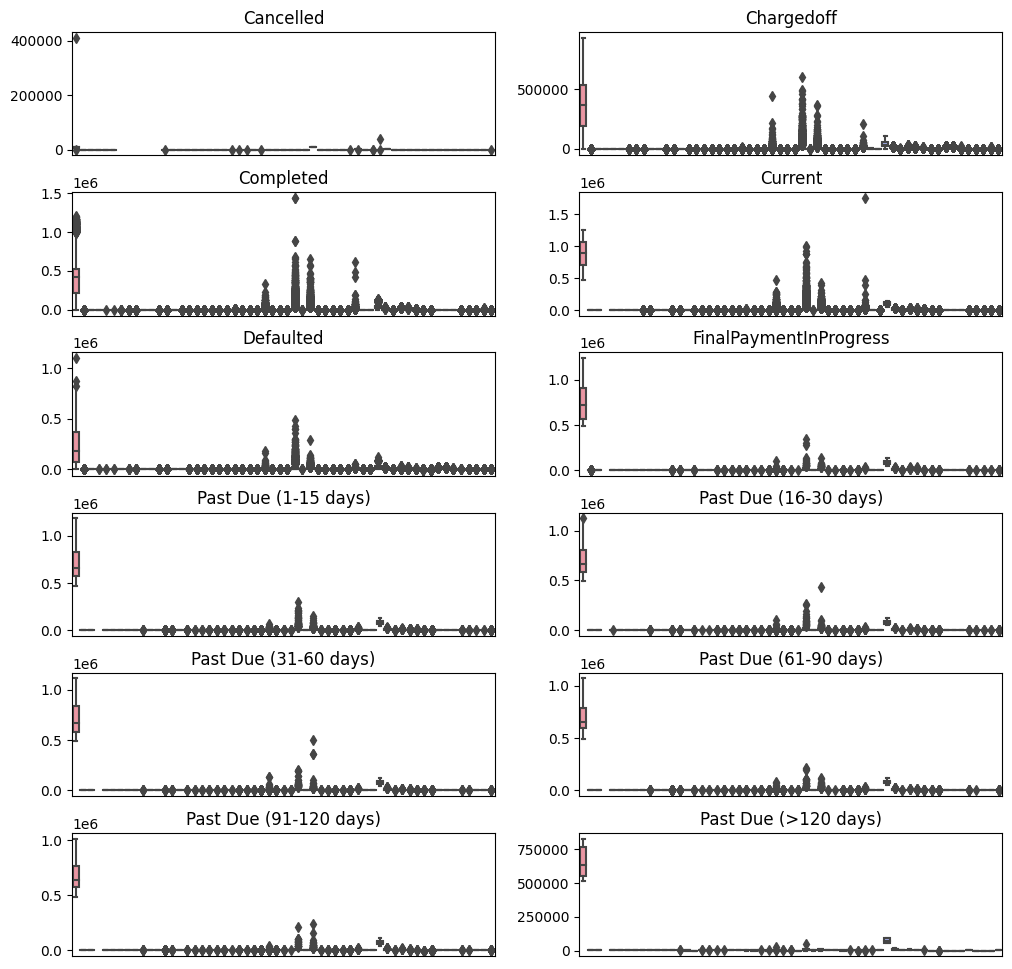

In [25]:
#plots after diving dataset based on loan values
fig=plt.figure(figsize=(12,12))
grid=plt.GridSpec(6,2,hspace=0.3,wspace=0.2)
for i in range(6):
    for j in range(2):
        plt.subplot(grid[i,j])
        ax=sns.boxplot(data=df_status.get_group(2*i+j))
        ax.set_xticks([])
        ax.set_title(label_mapping[2*i+j])

In [26]:
#dtype for column ListingCreationDate
print(df.ListingCreationDate.dtype)
print(df.ListingCreationDate[0])

object
2007-08-26 19:09:29.263000000


In [27]:
#dtype for column ClosedDate
print(df.ClosedDate.dtype)
print(df.ClosedDate[0])

object
2009-08-14 00:00:00


In [28]:
#dtype for column LoanOriginationDate
print(df.LoanOriginationDate.dtype)
print(df.LoanOriginationDate[0])

object
2007-09-12 00:00:00


In [29]:
#dtype for column DateCreditPulled
print(df.DateCreditPulled.dtype)
print(df.DateCreditPulled[0])

object
2007-08-26 18:41:46.780000000


In [30]:
#Changing dtype to Pandas Datetime
df['ListingCreationDate']=pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['DateCreditPulled']=pd.to_datetime(df['DateCreditPulled'])
df['FirstRecordedCreditLine']=pd.to_datetime(df['FirstRecordedCreditLine'])

In [31]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 999)

In [32]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,2,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,3,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,2,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,0,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,3,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,3,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,0,6,102670,15000,2013-09-20,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [33]:
'ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','CurrentlyInGroup','IncomeRange','IncomeVerifiable'

('ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'IncomeRange',
 'IncomeVerifiable')

In [34]:
df['ProsperRating (Alpha)']= label_encoder.fit_transform(df['ProsperRating (Alpha)'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['ProsperRating (Alpha)'].unique()

{0: 'A', 1: 'AA', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'HR', 7: nan}


array([7, 0, 4, 2, 5, 3, 1, 6])

In [35]:
df['BorrowerState']= label_encoder.fit_transform(df['BorrowerState'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['BorrowerState'].unique()

{0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'ME', 22: 'MI', 23: 'MN', 24: 'MO', 25: 'MS', 26: 'MT', 27: 'NC', 28: 'ND', 29: 'NE', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NV', 34: 'NY', 35: 'OH', 36: 'OK', 37: 'OR', 38: 'PA', 39: 'RI', 40: 'SC', 41: 'SD', 42: 'TN', 43: 'TX', 44: 'UT', 45: 'VA', 46: 'VT', 47: 'WA', 48: 'WI', 49: 'WV', 50: 'WY', 51: nan}


array([ 5, 10, 23, 32, 16,  4, 14, 20, 51,  1,  3, 45,  9, 38, 37, 22, 34,
       18, 48, 35, 27, 47, 33, 31, 43,  2, 40,  8, 24, 29, 44,  7, 19,  6,
       15, 17, 36, 25, 49, 39, 42, 13, 26, 11, 30, 46, 50, 21,  0, 12, 41,
       28])

In [36]:
df['Occupation']= label_encoder.fit_transform(df['Occupation'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['Occupation'].unique()

{0: 'Accountant/CPA', 1: 'Administrative Assistant', 2: 'Analyst', 3: 'Architect', 4: 'Attorney', 5: 'Biologist', 6: 'Bus Driver', 7: 'Car Dealer', 8: 'Chemist', 9: 'Civil Service', 10: 'Clergy', 11: 'Clerical', 12: 'Computer Programmer', 13: 'Construction', 14: 'Dentist', 15: 'Doctor', 16: 'Engineer - Chemical', 17: 'Engineer - Electrical', 18: 'Engineer - Mechanical', 19: 'Executive', 20: 'Fireman', 21: 'Flight Attendant', 22: 'Food Service', 23: 'Food Service Management', 24: 'Homemaker', 25: 'Investor', 26: 'Judge', 27: 'Laborer', 28: 'Landscaping', 29: 'Medical Technician', 30: 'Military Enlisted', 31: 'Military Officer', 32: 'Nurse (LPN)', 33: 'Nurse (RN)', 34: "Nurse's Aide", 35: 'Other', 36: 'Pharmacist', 37: 'Pilot - Private/Commercial', 38: 'Police Officer/Correction Officer', 39: 'Postal Service', 40: 'Principal', 41: 'Professional', 42: 'Professor', 43: 'Psychologist', 44: 'Realtor', 45: 'Religious', 46: 'Retail Management', 47: 'Sales - Commission', 48: 'Sales - Retail', 4

array([35, 41, 50, 19, 48, 27, 22, 20, 66, 13, 12, 47, 46, 18, 30, 11, 67,
       59, 10,  0,  4, 33,  2, 34, 25, 44, 21, 32, 31, 23, 65,  1, 38, 51,
       63, 29, 42, 39,  9, 36, 62, 49, 14, 17,  3, 28, 61,  6, 64, 16, 15,
        8, 55, 40, 60, 37, 45, 24, 53, 58, 43,  5, 56, 26, 54,  7, 57, 52])

In [37]:
df['EmploymentStatus']= label_encoder.fit_transform(df['EmploymentStatus'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['EmploymentStatus'].unique()

{0: 'Employed', 1: 'Full-time', 2: 'Not available', 3: 'Not employed', 4: 'Other', 5: 'Part-time', 6: 'Retired', 7: 'Self-employed', 8: nan}


array([7, 0, 2, 1, 4, 8, 3, 5, 6])

In [38]:
df['IsBorrowerHomeowner']= label_encoder.fit_transform(df['IsBorrowerHomeowner'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['IsBorrowerHomeowner'].unique()

{0: False, 1: True}


array([1, 0])

In [39]:
df['CurrentlyInGroup']= label_encoder.fit_transform(df['CurrentlyInGroup'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['CurrentlyInGroup'].unique()

{0: False, 1: True}


array([1, 0])

In [40]:
df['IncomeRange']= label_encoder.fit_transform(df['IncomeRange'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['IncomeRange'].unique()

{0: '$0', 1: '$1-24,999', 2: '$100,000+', 3: '$25,000-49,999', 4: '$50,000-74,999', 5: '$75,000-99,999', 6: 'Not displayed', 7: 'Not employed'}


array([3, 4, 6, 2, 5, 1, 7, 0])

In [41]:
df['IncomeVerifiable']= label_encoder.fit_transform(df['IncomeVerifiable'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(label_mapping)
df['IncomeVerifiable'].unique()

{0: False, 1: True}


array([1, 0])

In [42]:
df=df.drop(['ListingCreationDate','ClosedDate','LoanOriginationDate','DateCreditPulled','FirstRecordedCreditLine'],axis=1)

In [43]:
df=df.drop(['LoanKey','MemberKey','ListingKey'],axis=1)
df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,2,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,7,NaN,0,5,35,7,2.0,1,1,640.0,659.0,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,3,1,3083.333333,0,78,19141,9425,Q3 2007,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,3,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,0,7.0,2,5,41,0,44.0,0,0,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,4,1,6125.000000,0,0,134815,10000,Q1 2014,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,2,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,7,NaN,0,10,35,2,NaN,0,1,480.0,499.0,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,6,1,2083.333333,0,86,6466,3001,Q1 2007,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,0,9.0,16,10,50,0,113.0,1,0,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,3,1,2875.000000,0,16,77296,10000,Q4 2012,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,3,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4,4.0,2,23,19,0,44.0,1,0,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,2,1,9583.333333,0,6,102670,15000,Q3 2013,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [44]:
df[['LoanOriginatedQuarter', 'LoanOriginatedYear']] = df['LoanOriginationQuarter'].str.split(' ', expand=True)
df['LoanOriginatedQuarter'] = df['LoanOriginatedQuarter'].str.extract('(\d+)')

In [45]:
df=df.drop(['LoanOriginationQuarter'],axis=1)

In [46]:
df.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMon

In [47]:
df["LoanCurrentDaysDelinquent"].value_counts()

0       94860
121       293
10        192
4          77
11         62
        ...  
582         1
1099        1
2555        1
787         1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2411, dtype: int64

In [48]:
df["Status"] = df["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x > 180 else 0)

In [49]:
df['Status']

0         0
1         0
2         0
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    0
113936    0
Name: Status, Length: 113937, dtype: int64

In [50]:
df.shape

(113937, 64)

In [51]:
df.isnull().sum()[df.isnull().sum()!=0]

BorrowerAPR                              25
EstimatedEffectiveYield               29084
EstimatedLoss                         29084
EstimatedReturn                       29084
ProsperRating (numeric)               29084
ProsperScore                          29084
EmploymentStatusDuration               7625
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
CurrentCreditLines                     7604
OpenCreditLines                        7604
TotalCreditLinespast7years              697
InquiriesLast6Months                    697
TotalInquiries                         1159
CurrentDelinquencies                    697
AmountDelinquent                       7622
DelinquenciesLast7Years                 990
PublicRecordsLast10Years                697
PublicRecordsLast12Months              7604
RevolvingCreditBalance                 7604
BankcardUtilization                    7604
AvailableBankcardCredit                7544
TotalTrades                     

In [52]:
df=df.dropna(axis=0)

In [53]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

Exploratory Data Analysis

In [54]:
df.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMon

In [55]:
df.shape

(77543, 64)

In [56]:
df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginatedQuarter,LoanOriginatedYear,Status
1,1209647,36,3,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,0,7.0,2,5,41,0,44.0,0,0,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,4,1,6125.000000,0,0,134815,10000,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,1,2014,0
3,658116,36,3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,0,9.0,16,10,50,0,113.0,1,0,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,3,1,2875.000000,0,16,77296,10000,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,4,2012,0
4,909464,36,3,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4,4.0,2,23,19,0,44.0,1,0,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,2,1,9583.333333,0,6,102670,15000,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,3,2013,0
5,1074836,60,3,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,2,10.0,1,32,41,0,82.0,1,0,740.0,759.0,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,2,1,8333.333333,0,3,123257,15000,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,4,2013,0
6,750899,36,3,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,5,2.0,1,16,48,0,172.0,0,0,680.0,699.0,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,1929.0,16.0,0.68,0.0,0.27,3,1,2083.333333,0,11,88353,3000,122.67,1226.70,604.25,622.45,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2,2013,0


In [57]:
x=df.iloc[:,0:df.shape[1]-1].values
y=df.iloc[:,df.shape[1]-1].values

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

In [61]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [62]:
y_pred = classifier.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred)*100)

94.43548907086208


In [69]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Example for classification
mi_scores_classif = mutual_info_classif(X_train, y_train)
# Example for regression
# mi_scores_regression = mutual_info_regression(X_train, y_train)

# Print the mutual information scores for each feature
print("Mutual Information Scores:")
print(mi_scores_classif)

# Select the top k features based on mutual information
k = 2
top_k_features = np.argsort(mi_scores_classif)[::-1][:k]
selected_features = X_train[:, top_k_features]

print(f"Selected Features: {selected_features.shape[1]}")
print("Indices of selected features:", top_k_features)

# Optionally, you can use these selected features for training a model
# For example, using a Random Forest classifier for classification
clf = LogisticRegression(random_state = 0)
clf.fit(selected_features, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test[:, top_k_features], y_test)
print(f"Accuracy on the test set: {accuracy}")

Mutual Information Scores:
[4.64993146e-02 7.18300037e-03 2.00059920e-01 4.74522019e-02
 4.65109933e-02 4.51993087e-02 4.51939528e-02 4.46009912e-02
 4.87914103e-02 1.60671097e-02 1.83340898e-02 4.63086931e-03
 6.32862141e-03 9.37244242e-05 3.71764565e-03 5.01561172e-03
 2.03875898e-03 9.82134739e-03 0.00000000e+00 3.64883783e-03
 4.50996722e-03 6.65701660e-03 7.38989714e-03 2.75796116e-03
 7.33503188e-03 9.52854964e-03 5.03492349e-03 1.01045474e-03
 1.68764410e-03 2.27995479e-03 6.77899941e-04 2.66704970e-03
 1.38083025e-03 6.90467198e-03 5.72139212e-03 5.77712415e-03
 1.45958645e-03 4.69975215e-03 2.44517534e-03 2.48694466e-03
 7.21604232e-03 1.34111185e-02 7.97318436e-03 2.20358100e-01
 4.55140685e-02 4.59023689e-02 1.21579011e-02 3.14908633e-02
 3.19893760e-02 3.05077087e-02 1.14690263e-02 1.42846357e-02
 1.47593210e-02 1.91418899e-01 1.91872792e-01 1.46745606e-02
 1.20957509e-02 5.68437002e-04 1.27763563e-04 7.31099189e-05
 1.95918932e-02 4.62444491e-03 4.49629055e-02]
Selected Fe